In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm
import sys
sys.path.insert(1, '../../utils/')
import src_utils

# 1. Load in data

In [16]:
resids_df = pd.read_csv('../../utils/residuals.csv', index_col=0)
raw = pd.read_csv('../../utils/point_muts.csv', index_col=0, header=[0, 1])

# Separate into numpy arrays for easier use
resids = resids_df['envision_scaled_resids'].values
dmso = raw.loc[:, ('Zero', 'score')].values
rad = raw.loc[:, ('Radicicol', 'score')].values

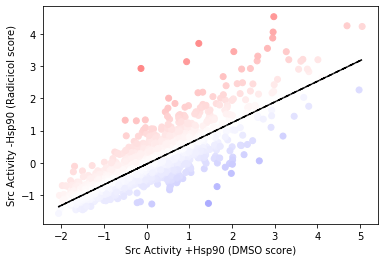

In [32]:
# Calculate max score for consistent cmapping
max_abs = np.nanmax(abs(np.concatenate((resids, dmso, rad), axis=-1)).flatten())

# Plot individual points
plt.scatter(dmso, rad, c=resids, cmap='bwr', vmin=-max_abs, vmax=max_abs)

# Plot line of best fit
coef = np.polyfit(dmso, rad, 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(dmso, poly1d_fn(dmso), '--k')

# Plot labels
plt.ylabel('Src Activity -Hsp90 (Radicicol score)')
plt.xlabel('Src Activity +Hsp90 (DMSO score)')
plt.show()

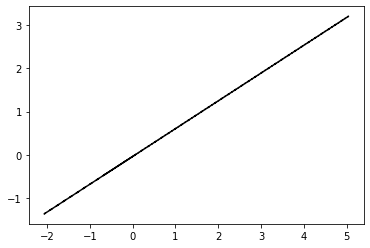